In [1]:
# === 1. Import Library ===
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



# === 2. Load Dataset ===
df = pd.read_csv("Tesla.csv")

In [2]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)

# === 3. Lihat struktur data ===
print("Ukuran dataset:", df.shape)
print("\nNama kolom:", df.columns.tolist())
print("\n5 data teratas:")
display(df.head())

Ukuran dataset: (1692, 7)

Nama kolom: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

5 data teratas:


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


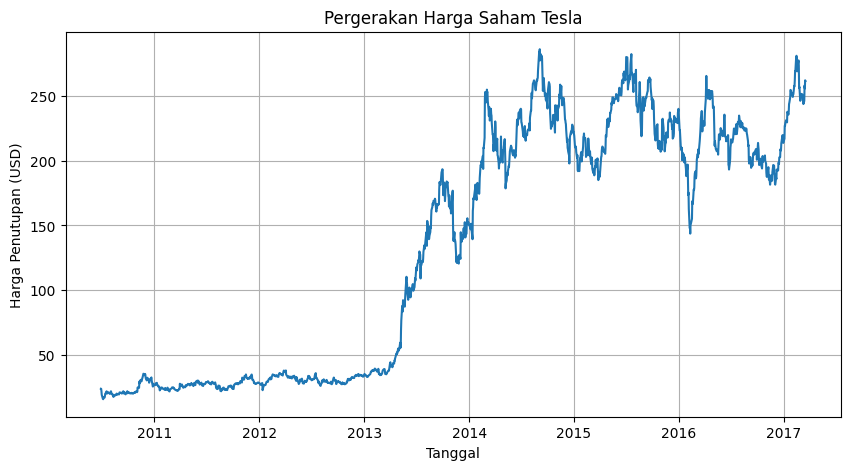

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title('Pergerakan Harga Saham Tesla')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Fokus pada kolom 'Close' (harga penutupan)
data_close = df[['Close']].values

# Normalisasi agar nilainya antara 0 dan 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_close)


In [5]:
time_step = 30
X, y = [], []

for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i - time_step:i, 0])  # 30 hari sebelumnya
    y.append(scaled_data[i, 0])                # target: hari ke-31

X, y = np.array(X), np.array(y)

print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

# === 3. Reshape data ke format 3D (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print("Setelah reshape:", X.shape)

Ukuran X: (1662, 30)
Ukuran y: (1662,)
Setelah reshape: (1662, 30, 1)


In [6]:


# === 1. Split data menjadi train dan test ===
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# === 2. Membangun Arsitektur Model ===
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# === 3. Compile Model ===
model.compile(optimizer='adam', loss='mean_squared_error')

# === 4. Train Model ===
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


c:\Users\HD\miniforge3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0208 - val_loss: 0.0031
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 9/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 10/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 11/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 12/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0

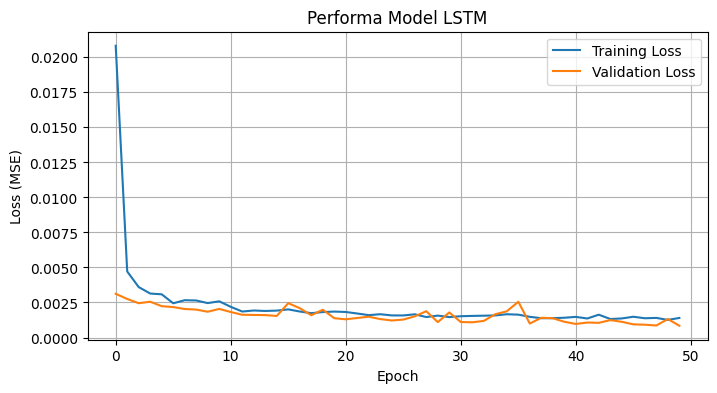

In [7]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Performa Model LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
📈 RMSE : 7.84
📉 MAE  : 5.94


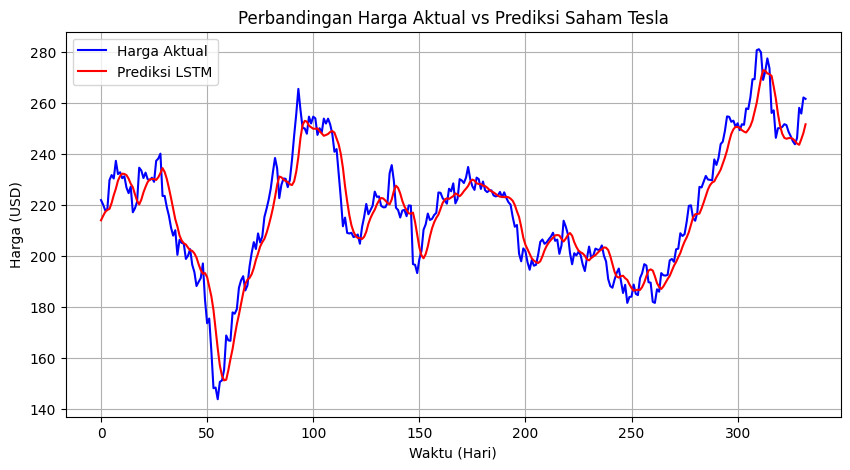

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# === 1️⃣ Prediksi ===
predictions = model.predict(X_test)

# === 2️⃣ Inverse Transform (kembali ke skala asli) ===
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# === 3️⃣ Evaluasi Kinerja ===
rmse = math.sqrt(mean_squared_error(y_test_unscaled, predictions))
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"📈 RMSE : {rmse:.2f}")
print(f"📉 MAE  : {mae:.2f}")

# === 4️⃣ Visualisasi Hasil Prediksi ===
plt.figure(figsize=(10,5))
plt.plot(y_test_unscaled, label='Harga Aktual', color='blue')
plt.plot(predictions, label='Prediksi LSTM', color='red')
plt.title('Perbandingan Harga Aktual vs Prediksi Saham Tesla')
plt.xlabel('Waktu (Hari)')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# === 💾 1️⃣ Simpan Model LSTM ===
# Format HDF5 (.h5) agar mudah digunakan kembali
model.save("model_tesla.h5")
print("✅ Model LSTM berhasil disimpan sebagai 'model_tesla.h5'")

# === 💾 2️⃣ Simpan Scaler ===
import joblib
joblib.dump(scaler, "scaler_tesla.pkl")
print("✅ Scaler berhasil disimpan sebagai 'scaler_tesla.pkl'")

# === 💾 3️⃣ Simpan Data Prediksi dan Aktual untuk Analisis Tambahan ===
hasil_df = pd.DataFrame({
    "Actual": y_test_unscaled.flatten(),
    "Predicted": predictions.flatten()
})
hasil_df.to_csv("hasil_prediksi_tesla.csv", index=False)
print("✅ Hasil prediksi disimpan sebagai 'hasil_prediksi_tesla.csv'")

# === 📊 4️⃣ (Opsional) Tampilkan 5 baris pertama hasil prediksi ===
print("\nContoh hasil prediksi:")
display(hasil_df.head())


✅ Model LSTM berhasil disimpan sebagai 'model_tesla.h5'
✅ Scaler berhasil disimpan sebagai 'scaler_tesla.pkl'
✅ Hasil prediksi disimpan sebagai 'hasil_prediksi_tesla.csv'

Contoh hasil prediksi:


,Actual,Predicted
0,221.800003,213.849167
1,220.009995,215.590485
2,217.750000,217.147842
3,218.250000,217.928299
4,229.639999,218.319290
